In [7]:
#a
import scipy.stats as stats

mean = 170
std_dev = 10

percentage = (stats.norm.cdf(180, mean, std_dev) - stats.norm.cdf(160, mean, std_dev)) * 100
print(percentage)

68.26894921370858


In [8]:
#b
sample_size = 100
sample_mean = mean
sample_std_dev = std_dev / (sample_size ** 0.5)

probability = 1 - stats.norm.cdf(175, sample_mean, sample_std_dev)
print(probability)

2.866515719235352e-07


In [9]:
#c
z_score = (185 - mean) / std_dev
print(z_score)

1.5


In [10]:
#d
height = stats.norm.ppf(0.05, mean, std_dev)
print(height)

153.55146373048527


In [11]:
#e
cv = (std_dev / mean) * 100
print(cv)

5.88235294117647


In [24]:
#a. Measure the dispersion in both and interpret the results.
#Sol-
import pandas as pd
df=pd.read_csv(r"data.csv")
before_variance = df[" Blood Pressure Before (mmHg)"].var()
after_variance = df[" Blood Pressure After (mmHg)"].var()
print("Variance before:",before_variance,"Variance after:",after_variance)

Variance before: 43.53727272727271 Variance after: 47.4448484848485


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean: Patient ID                        50.50
 Blood Pressure Before (mmHg)    133.91
 Blood Pressure After (mmHg)     128.36
dtype: float64
Confidence Interval (95%): (array([ 44.74349058, 132.60075849, 126.99326698]), array([ 56.25650942, 135.21924151, 129.72673302]))


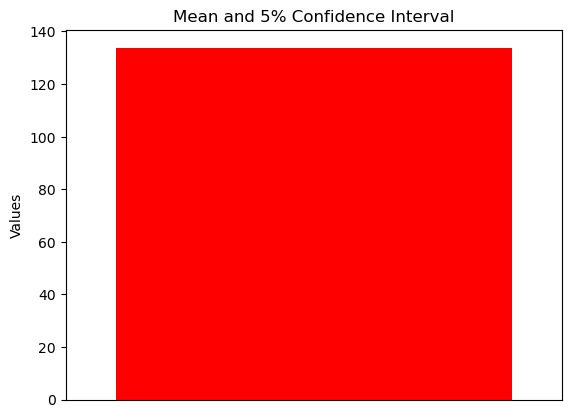

In [26]:
#b
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
mean = np.mean(df)
confidence_interval = stats.t.interval(0.95, len(df) - 1, loc=mean, scale=stats.sem(df))
print("Mean:", mean)
print("Confidence Interval (95%):", confidence_interval)
#plotting in a bar graph
plt.figure()
plt.bar(x=1, height=mean, color='red')
plt.xticks([])
plt.xlim(0.5, 1.5)
plt.ylabel("Values")
plt.title("Mean and 5% Confidence Interval")
plt.show()

In [27]:
#c
ms = np.mean(np.abs(df - np.mean(df)))
sd = np.std(df)
print("Mean absolute deviation",ms)
print("standard deviation",sd)

Mean absolute deviation Patient ID                       25.0000
 Blood Pressure Before (mmHg)     5.7118
 Blood Pressure After (mmHg)      5.9000
dtype: float64
standard deviation Patient ID                       28.866070
 Blood Pressure Before (mmHg)     6.565204
 Blood Pressure After (mmHg)      6.853495
dtype: float64


In [28]:
#d
variable1 = df[' Blood Pressure Before (mmHg)']
variable2 = df[' Blood Pressure After (mmHg)']

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(variable1, variable2)

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Check the significance at 1% level
if p_value < 0.01:
    print("The correlation coefficient is significant at the 1% level.")
else:
    print("The correlation coefficient is not significant at the 1% level.")

Correlation Coefficient: 0.9779485966556019
p-value: 1.8097381433068541e-68
The correlation coefficient is significant at the 1% level.


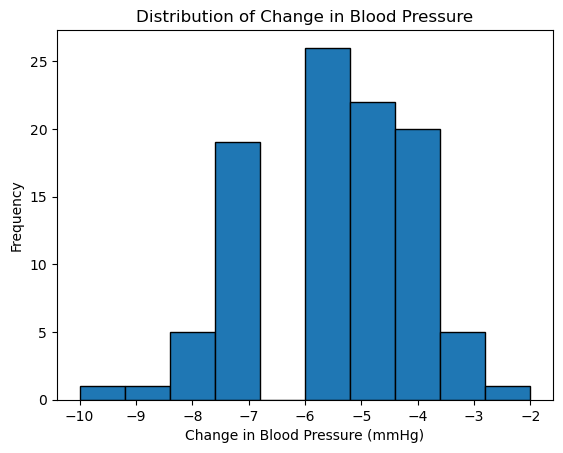

In [32]:
# Answer:# Calculate the change in blood pressure
change_in_bp =df[' Blood Pressure After (mmHg)'] - df[' Blood Pressure Before (mmHg)']

# Plot a histogram of the change in blood pressure
plt.hist(change_in_bp, bins=10, edgecolor='black')
plt.xlabel("Change in Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.title("Distribution of Change in Blood Pressure")
plt.show()

In [ ]:
Q-8. The anxiety levels of 10 participants were measured before and after a new therapy.
The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether
the therapy had a significant effect on anxiety levels. The data is given below: Participant
Before therapy After therapy Difference

In [33]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Before therapy': [10, 8, 12, 15, 6, 9, 11, 7, 14, 10],
    'After therapy': [7, 6, 10, 12, 5, 8, 9, 6, 12, 8],
    'Difference': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
}

# Create a DataFrame from the dictionary
df1= pd.DataFrame(data)

# Calculate the difference
df1['Difference'] = df1['After therapy'] - df1['Before therapy']

# Print the DataFrame
print(df1)

   Participant  Before therapy  After therapy  Difference
0            1              10              7          -3
1            2               8              6          -2
2            3              12             10          -2
3            4              15             12          -3
4            5               6              5          -1
5            6               9              8          -1
6            7              11              9          -2
7            8               7              6          -1
8            9              14             12          -2
9           10              10              8          -2


In [34]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(df1['Before therapy'], df1['After therapy'])

# Print the test statistic and p-value
print("Wilcoxon signed-rank test statistic:", statistic)
print("p-value:", p_value)

Wilcoxon signed-rank test statistic: 0.0
p-value: 0.001953125


In [36]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Name': ['Karan', 'Deepa', 'Karthik', 'Chandan', 'Jeevan'],
    'Exam 1': [85, 70, 90, 75, 95],
    'Exam 2': [90, 80, 85, 70, 92],
    'Final Exam': [92, 85, 88, 75, 96]
}

# Create a DataFrame from the dictionary
df2= pd.DataFrame(data)

# Print the DataFrame
print(df2)

      Name  Exam 1  Exam 2  Final Exam
0    Karan      85      90          92
1    Deepa      70      80          85
2  Karthik      90      85          88
3  Chandan      75      70          75
4   Jeevan      95      92          96


In [37]:
import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df2['Exam 1'], df2['Exam 2'], df2['Final Exam'])

# Print the F-statistic and p-value
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Calculate the maximum score for each student
df2['Max Score'] = df2[['Exam 1', 'Exam 2', 'Final Exam']].max(axis=1)

# Sort the DataFrame by the maximum score in descending order
sorted_df2 = df2.sort_values(by='Max Score', ascending=False)

# Get the student with the highest score
highest_score_student = sorted_df2.iloc[0]['Name']

# Print the student with the highest score
print("Student with the highest score:", highest_score_student)

F-statistic: 0.3236947791164659
p-value: 0.7295954253321559
Student with the highest score: Jeevan


In [38]:
#a
import scipy.stats as stats
import math

n = 500
p = 0.05
k = 20

mean = n * p
std_dev = math.sqrt(n * p * (1 - p))

probability_20_defective = stats.norm.cdf(k + 0.5, loc=mean, scale=std_dev) - stats.norm.cdf(k - 0.5, loc=mean, scale=std_dev)
print("Probability of exactly 20 bulbs being defective:", probability_20_defective)

Probability of exactly 20 bulbs being defective: 0.0483661403058116


In [39]:
#b
k = 10

probability_at_least_10_defective = stats.norm.sf(k - 0.5, loc=mean, scale=std_dev)
print("Probability of at least 10 bulbs being defective:", probability_at_least_10_defective)

Probability of at least 10 bulbs being defective: 0.9992649777488151


In [40]:
#c
k = 15

probability_at_most_15_defective = stats.norm.cdf(k + 0.5, loc=mean, scale=std_dev)
print("Probability of at most 15 bulbs being defective:", probability_at_most_15_defective)

Probability of at most 15 bulbs being defective: 0.025626291428684733


In [41]:
#d
expected_defective_bulbs = n * p
print("Expected number of defective bulbs:", expected_defective_bulbs)

Expected number of defective bulbs: 25.0


In [42]:
# Answer:
print("Column Names:", df.columns)

# Check the distribution of all the classes (in this case, it's the before and after blood pressure measurements)
class_distribution = df[' Blood Pressure Before (mmHg)'].value_counts()
print("Class Distribution:\n", class_distribution)

# Check for the equality of variance
variance_before = df[' Blood Pressure Before (mmHg)'].var()
variance_after = df[' Blood Pressure After (mmHg)'].var()
print("Variance - Before: ", variance_before)
print("Variance - After: ", variance_after)

# Perform LDA and QDA
# LDA assumes equal class covariance matrices and uses linear decision boundaries
# QDA relaxes the assumption of equal class covariance matrices and uses quadratic decision boundaries

# Check the equality of mean between all the classes
mean_before = df[' Blood Pressure Before (mmHg)'].mean()
mean_after = df[' Blood Pressure After (mmHg)'].mean()
print("Mean - Before: ", mean_before)
print("Mean - After: ", mean_after)

Column Names: Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')
Class Distribution:
 128    12
127    11
136    11
135     8
130     7
145     6
139     6
143     6
124     6
140     6
132     6
142     6
131     5
137     1
122     1
148     1
120     1
Name:  Blood Pressure Before (mmHg), dtype: int64
Variance - Before:  43.53727272727271
Variance - After:  47.4448484848485
Mean - Before:  133.91
Mean - After:  128.36
